# Fake News Detection Model 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fake_news=pd.read_csv('Fake.csv')
real_news=pd.read_csv('True.csv')
print(fake_news.shape, real_news.shape)

(23481, 4) (21417, 4)


As we can see, each dataset of the fake and real news is more than 20000. This size is adequate based on the findings from the Literature Review and will highly likely be sufficient in size for use in model testing or training. 

In [3]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
fake_news.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [5]:
!pip install wordcloud

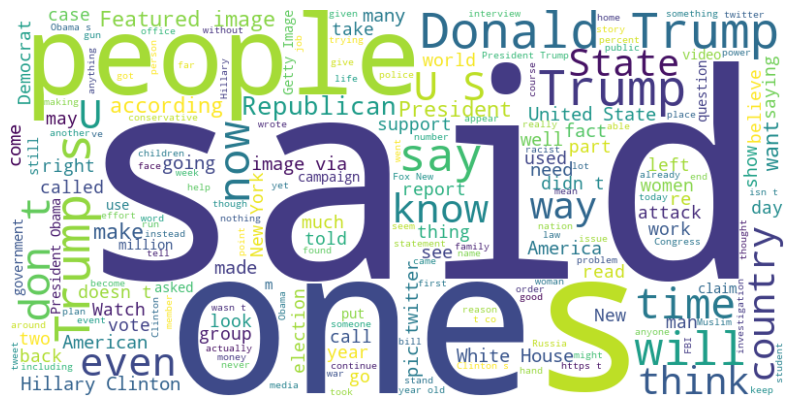

In [6]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
fake_df = pd.read_csv('Fake.csv')

# Concatenate all the text data into a single string
text = ' '.join(fake_df['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [7]:
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
real_news.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


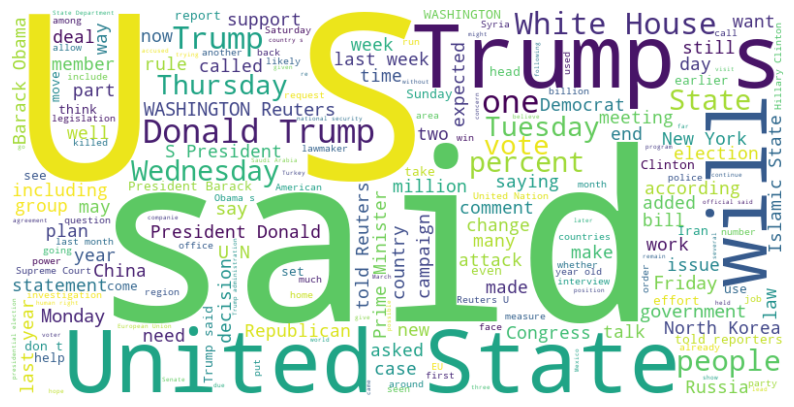

In [9]:
# Read the CSV file into a pandas DataFrame
real_df = pd.read_csv('True.csv')

# Concatenate all the text data into a single string
text = ' '.join(real_df['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Based on the initial observations from each dataset, one problem that I have identified would be that the entirety of the real news dataset starts with the name of the state that has the headline of the news which is indicated by 'STATE(Reuters) -'. In order to remove any biasness based on this text feature, we will remove this during data processing to reduce any potential problems while training the text classification model.

In [10]:
# Remove everthing before the hyphen using regular expression 
real_news['text'] = real_news['text'].str.replace(r'^.*?-', '', regex=True)

In [11]:
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017"


In [12]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# Random Forest Classifier

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Label the datasets (0 for fake, 1 for real)
fake_news['label'] = 0
real_news['label'] = 1

# Reduce each dataset to 1000 samples (hardware limitations)
fake_news = fake_news.sample(n=1000, random_state=42)
real_news = real_news.sample(n=1000, random_state=42)

# Combine the datasets into a single DataFrame
combined_df = pd.concat([fake_news, real_news], ignore_index=True)

# Split the combined dataset into features (X) and labels (y)
X = combined_df['text']
y = combined_df['label']

# Split the data into training and test sets (adjustments will be made as we test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  

# Vectorize the text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Print a classification report with precision, recall, F1-score, and support
report = classification_report(y_test, y_pred, target_names=['Fake', 'Real'])
print("Classification Report:")
print(report)

# Print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion)

Test Accuracy: 0.9625
Classification Report:
              precision    recall  f1-score   support

        Fake       0.95      0.97      0.96       199
        Real       0.97      0.95      0.96       201

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400


Confusion Matrix:
[[194   5]
 [ 10 191]]


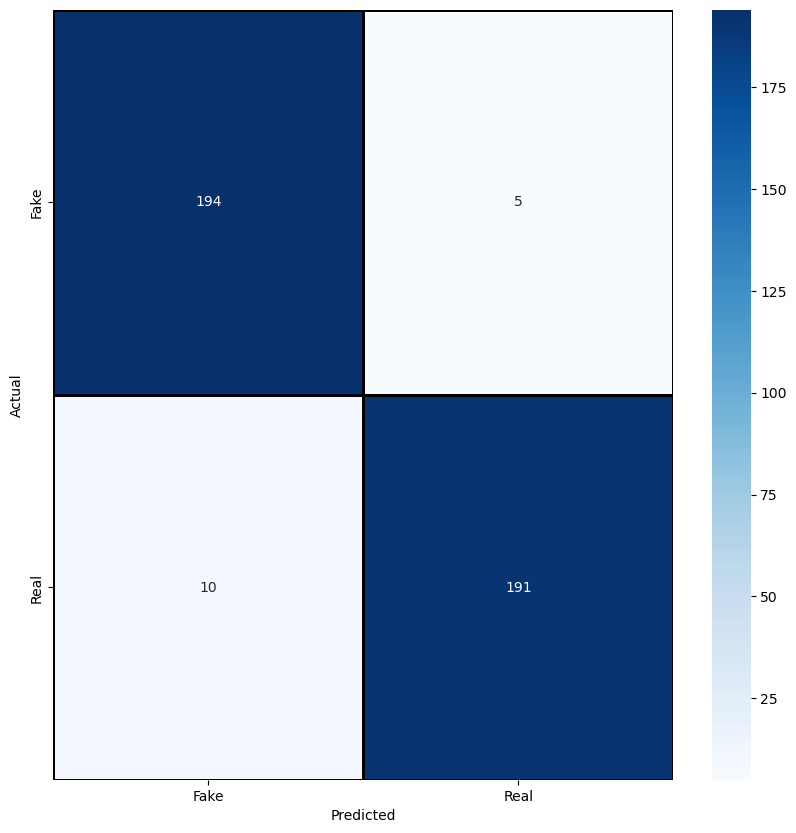

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot the confusion matrix 
plt.figure(figsize=(10, 10))
sns.heatmap(confusion, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

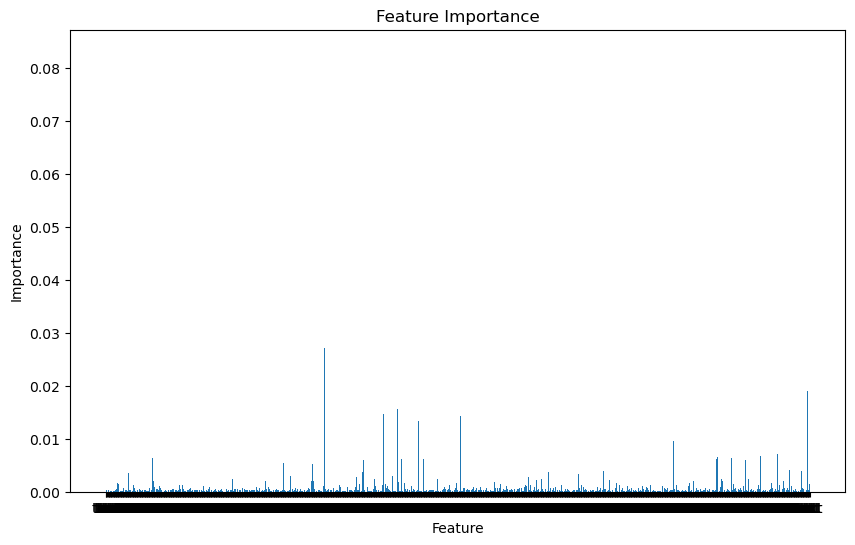

<Figure size 1200x800 with 0 Axes>

In [16]:
# Convert X_train from Series to DataFrame
X_train_df = pd.DataFrame(X_train)

# Visualize feature importance
feature_importance = rf_classifier.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X_train_df.columns)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.figure(figsize=(12, 8))  
plt.show()

In [17]:
# Get the indices of the top 4 most important features
top_feature_indices = feature_importance.argsort()[-4:][::-1]

# Get the names of the top 4 features from the TF-IDF vectorizer
top_feature_names = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_feature_indices]

print("Top 4 Features:")
for feature in top_feature_names:
    print(feature)

    

Top 4 Features:
said
via
on
featured


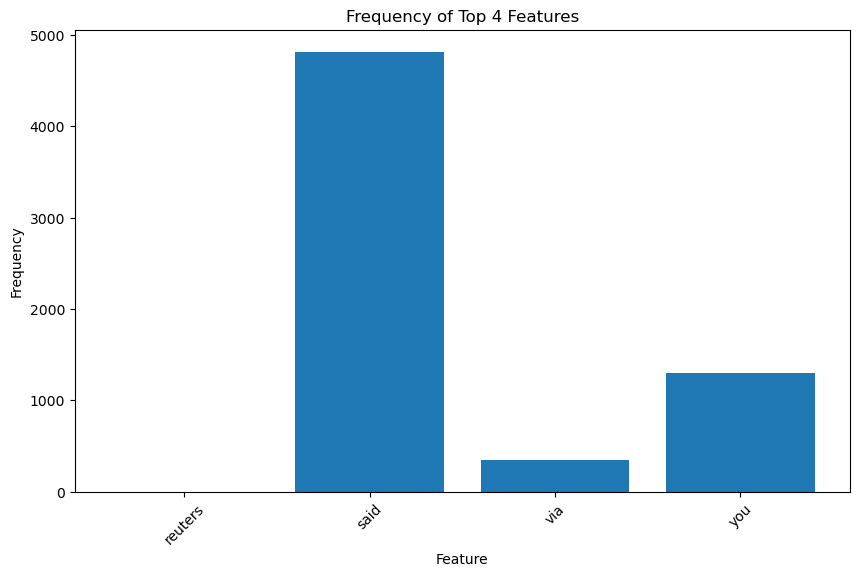

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# define the top features for the text model
top_feature_names = ["reuters", "said", "via", "you"]  
top_feature_indices = [0, 1, 2, 3]  

# Calculate the frequency of each top feature 
feature_frequencies = []

for index in top_feature_indices:
    feature_name = top_feature_names[index]
    feature_frequency = X_train.str.count(r'\b' + feature_name + r'\b').sum()
    feature_frequencies.append(feature_frequency)

# Create a DataFrame for easy plotting
frequency_df = pd.DataFrame({'Feature': top_feature_names, 'Frequency': feature_frequencies})

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(frequency_df['Feature'], frequency_df['Frequency'])
plt.title("Frequency of Top 4 Features")
plt.xlabel("Feature")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  
plt.show()


# BERT Model - Ensemble Method

Imports and Function Definitions

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'pre_classifi


Epoch Batch: 1 / 3 
Training in progress, please wait...

  Average training loss value: 0.67
  Time taken for training epoch : 1:04:33

Running tests on Model Validation...
  Validation Loss: 0.67
  Validation took: 0:08:32

Epoch Batch: 2 / 3 
Training in progress, please wait...

  Average training loss value: 0.62
  Time taken for training epoch : 1:10:09

Running tests on Model Validation...
  Validation Loss: 0.66
  Validation took: 0:07:36

Epoch Batch: 3 / 3 
Training in progress, please wait...

  Average training loss value: 0.60
  Time taken for training epoch : 1:04:45

Running tests on Model Validation...
  Validation Loss: 0.65
  Validation took: 0:08:04


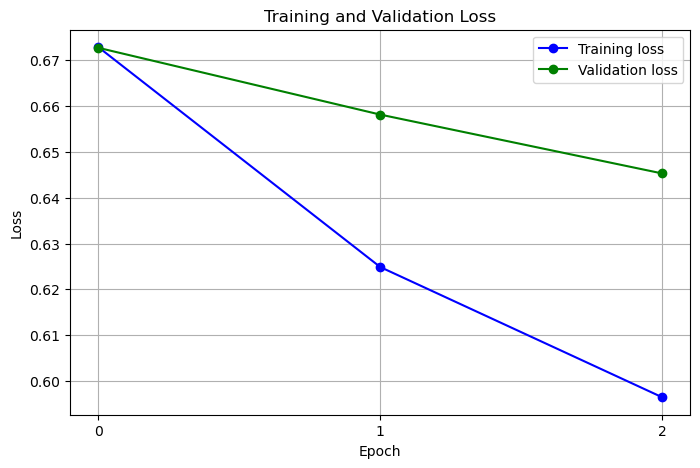


Training has been completed! The confusion matrix is plot above


In [19]:
import torch
import pandas as pd
import numpy as np
import time
import datetime
import random
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import matplotlib.pyplot as plt

# The primary method of training implementation is based on the code run_glue.py script that runs mutiple epoch batches. Source is found here: https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128
# Function to format time in hh:mm:ss
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

# Function to compute the accuracy of the BERT model
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Then we load the two datasets
true_data = pd.read_csv("True.csv")
false_data = pd.read_csv("Fake.csv")

# Combine the datasets and assign labels for real and fake, 1 and 0 rsp.
true_data['label'] = 1
false_data['label'] = 0

# Reduce each dataset to a smaller size - HARDWARE LIMITATION
false_data = false_data.sample(n=50, random_state=2)
true_data = true_data.sample(n=50, random_state=2)

combined_data = pd.concat([true_data, false_data], ignore_index=True)

# Shuffle the combined dataset
combined_data = combined_data.sample(frac=1).reset_index(drop=True)

# Split the dataset into training and validation sets, we will use 80% ratio for now
train_size = int(0.8 * len(combined_data))
val_size = len(combined_data) - train_size

train_data = combined_data[:train_size]
val_data = combined_data[train_size:]

# Load the DistilBERT tokenizer (simple loading)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)

# Tokenize the input data for training 
train_encodings = tokenizer(train_data['text'].tolist(), truncation=True, padding=True)
val_encodings = tokenizer(val_data['text'].tolist(), truncation=True, padding=True)

# Convert tokenized data to PyTorch tensors
train_labels = torch.tensor(train_data['label'].values)
val_labels = torch.tensor(val_data['label'].values)

train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']),
                              torch.tensor(train_encodings['attention_mask']),
                              train_labels)
val_dataset = TensorDataset(torch.tensor(val_encodings['input_ids']),
                            torch.tensor(val_encodings['attention_mask']),
                            val_labels)

# Define a smaller batch size (Additional step for hardware limitations)
batch_size = 20

# Create data loaders with less number of workers to speed up data loading (optimization)
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size, num_workers=0)
validation_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size, num_workers=0)

# Set the seed value
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Instantiate the pre-trained DistilBERT model for sequence classification
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", 
    num_labels=2
)

# Set the device to GPU if available - Cuts down the time!
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define the optimizer with a smaller learning rate
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Define the number of epochs (reduced to speed up training, can look to explore greater epoch)
epochs = 3

# Create a learning rate scheduler
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=total_steps)

# Store the average loss after each epoch
train_loss_values = []
val_loss_values = []

# For each epoch, we will train and then print the training loss and time taken
for epoch_i in range(0, epochs):
    
    print("")
    print('Epoch Batch: {:} / {:} '.format(epoch_i + 1, epochs))
    print('Training in progress, please wait...')

    t0 = time.time()

    total_train_loss = 0

    model.train()

    for step, batch in enumerate(train_dataloader):

        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        

        outputs = model(b_input_ids, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
        
        loss = outputs.loss

        total_train_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    train_loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss value: {0:.2f}".format(avg_train_loss))
    print("  Time taken for training epoch : {:}".format(format_time(time.time() - t0)))
        
    print("")
    print("Running tests on Model Validation...")

    t0 = time.time()

    model.eval()

    # Evaluate the model
    total_eval_loss = 0
    nb_eval_steps = 0

    for batch in validation_dataloader:

        batch = tuple(t.to(device) for t in batch)

        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():        

            outputs = model(b_input_ids, 
                            attention_mask=b_input_mask,
                            labels=b_labels)  # Provide labels during evaluation

        loss = outputs.loss

        if loss is not None:  # Check if the loss is returned
            total_eval_loss += loss.item()

    avg_val_loss = total_eval_loss / len(validation_dataloader) if len(validation_dataloader) > 0 else 0  # Avoid division by zero

    val_loss_values.append(avg_val_loss)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

# Plot the training and validation loss
plt.figure(figsize=(8,5))
plt.plot(train_loss_values, 'b-o', label='Training loss')
plt.plot(val_loss_values, 'g-o', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(0, epochs))
plt.legend()
plt.grid(True)
plt.show()

print("\nTraining has been completed! The confusion matrix is plot above")


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Evaluate the model on the validation set
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    confusion = confusion_matrix(all_labels, all_preds)
    
    return accuracy, precision, recall, f1, confusion

# Evaluate the model
accuracy, precision, recall, f1, confusion = evaluate_model(model, validation_dataloader)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.5500
Precision: 1.0000
Recall: 0.4000
F1-score: 0.5714


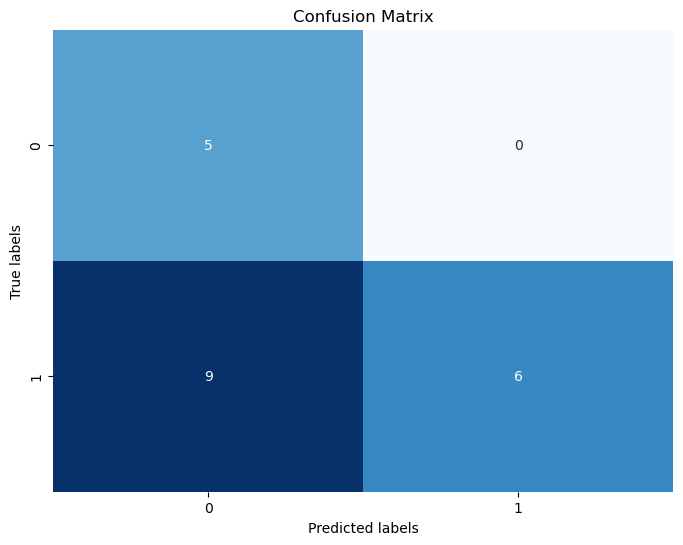

In [22]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Save the trained model
torch.save(model.state_dict(), 'bert_model.pth')

# Load the saved model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
model.load_state_dict(torch.load('bert_model.pth'))
model.eval()

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'pre_classifi

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [4]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer
import pickle
# Load BERT model and tokenizer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Save the model and tokenizer
model_path = './model/bert_model.pkl'
tokenizer_path = './model/tokenizer.pkl'

# Save the model using torch.save()
torch.save(model.state_dict(), model_path)

# Save the tokenizer using pickle
with open(tokenizer_path, 'wb') as f:
    pickle.dump(tokenizer, f)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at